In [66]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [67]:
df = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [68]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
df.shape

(42000, 785)

In [70]:
import matplotlib.pyplot as plt

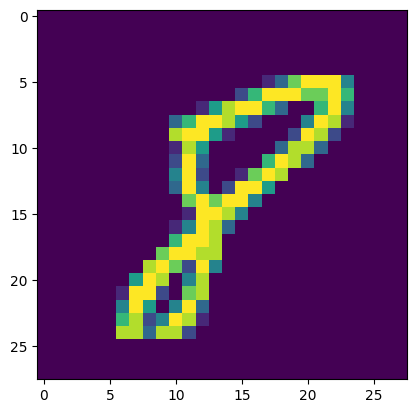

In [71]:
plt.imshow(df.iloc[18306,1:].values.reshape(28,28))

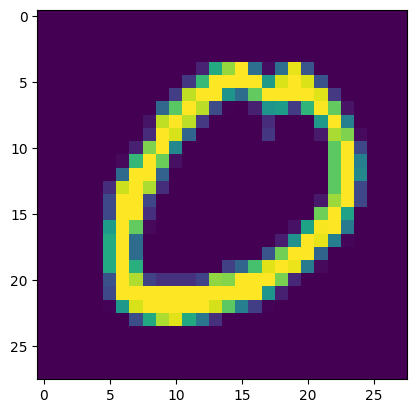

In [72]:
plt.imshow(df.iloc[13051,1:].values.reshape(28,28))

In [73]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [74]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [75]:
from sklearn.neighbors import KNeighborsClassifier

In [76]:
knn = KNeighborsClassifier()

In [77]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [78]:
import time
start = time.time()
y_pred = knn.predict(X_test)
print(time.time()-start)

14.196910619735718


In [79]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9648809523809524

In [80]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [81]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [82]:
from sklearn.decomposition import PCA
pca = PCA(n_components=200)

In [83]:
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [84]:
X_train_trf.shape

(33600, 200)

In [85]:
knn = KNeighborsClassifier()

In [86]:
knn.fit(X_train_trf,y_train)

KNeighborsClassifier()

In [87]:
y_pred = knn.predict(X_test_trf)

In [88]:
accuracy_score(y_test,y_pred)

0.9501190476190476

In [ ]:
for i in range(1,785):
    pca = PCA(n_components=i)
    X_train_trf = pca.fit_transform(X_train)
    X_test_trf = pca.transform(X_test)

    knn = KNeighborsClassifier()
    knn.fit(X_train_trf,y_train)
    y_pred = knn.predict(X_test_trf)
    print(accuracy_score(y_test,y_pred))

In [89]:
pca = PCA(n_components=2)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [90]:
X_train_trf

array([[-2.71864184, -0.49013858],
       [-0.67695987, -6.7528807 ],
       [-3.03324331,  6.51000746],
       ...,
       [ 2.1488548 ,  0.78114786],
       [ 1.05957022,  0.94676031],
       [17.70261635,  1.96156717]])

In [91]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter(x=X_train_trf[:,0],
                y=X_train_trf[:,1],
                color=y_train_trf,
                color_discrete_sequence=px.colors.qualitative.G10
                )
fig.show()

In [92]:
# transforming in 3D
pca = PCA(n_components=3)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [93]:
X_train_trf

array([[-2.71864131, -0.48993613,  1.1352651 ],
       [-0.67703249, -6.75355515, -2.33802449],
       [-3.0331306 ,  6.50987003,  7.49524269],
       ...,
       [ 2.14884894,  0.7809722 , -0.74715519],
       [ 1.05954573,  0.94750829,  3.94913138],
       [17.70253351,  1.96199022, -4.94533652]])

In [94]:
y_train_trf = y_train.astype(str)
fig = px.scatter_3d(df, x=X_train_trf[:,0], y=X_train_trf[:,1], z=X_train_trf[:,2], 
                     color=y_train_trf)

fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20)
)
fig.show()

In [95]:
# Eigen values
pca.explained_variance_

array([40.67111197, 29.17023398, 26.74459355])

In [96]:
# Eigen vectors
pca.components_.shape

(3, 784)

In [97]:
pca.explained_variance_ratio_

array([0.05785192, 0.0414927 , 0.03804239])

In [98]:
# transforming in 3D
pca = PCA(n_components=None)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [99]:
pca.explained_variance_.shape

(784,)

In [100]:
pca.components_.shape

(784, 784)

In [101]:
np.cumsum(pca.explained_variance_ratio_)

array([0.05785192, 0.09934462, 0.13738701, 0.16704964, 0.19286525,
       0.21541506, 0.23514574, 0.25289854, 0.26858504, 0.28294568,
       0.29664822, 0.30892077, 0.32038989, 0.33162017, 0.34220546,
       0.35240477, 0.36198153, 0.37140862, 0.38053351, 0.38943521,
       0.39783462, 0.40603525, 0.41388828, 0.42145568, 0.42882829,
       0.43584714, 0.44282633, 0.44953738, 0.45593583, 0.4622392 ,
       0.46839271, 0.4744166 , 0.48025334, 0.48603881, 0.49176214,
       0.49722614, 0.50265822, 0.50793994, 0.51307376, 0.51801392,
       0.52289063, 0.52771041, 0.53239246, 0.53698588, 0.54156249,
       0.54605468, 0.5505015 , 0.55491691, 0.55926803, 0.56358836,
       0.56780645, 0.57198888, 0.57606882, 0.58008887, 0.58407223,
       0.58801822, 0.59188694, 0.59571889, 0.59948441, 0.60322635,
       0.60687487, 0.6104829 , 0.61402176, 0.61750117, 0.62094441,
       0.62432378, 0.62767368, 0.63099377, 0.63426257, 0.63746765,
       0.64065542, 0.64376931, 0.64686564, 0.64992395, 0.65296

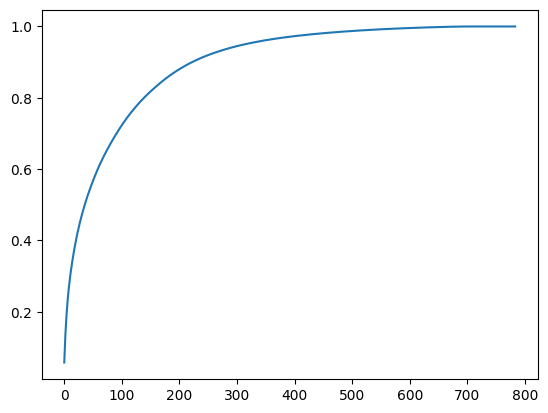

In [102]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))